In [2]:
import pandas as pd
import numpy as np

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec



In [4]:
df=pd.read_csv('Desktop/gt.csv')

In [5]:
df.head()

,overs,Batting Team,Batsman on strike,batsman on non-strike,bowler,runs scored,extras,out type,player dismissed,wides
0,0.1,Rajasthan Royals,T Kohli,YK Pathan,GD McGrath,0,0,NaN,NaN,NaN
1,0.2,Rajasthan Royals,T Kohli,YK Pathan,GD McGrath,0,0,NaN,NaN,NaN
2,0.3,Rajasthan Royals,T Kohli,YK Pathan,GD McGrath,0,0,NaN,NaN,NaN
3,0.4,Rajasthan Royals,T Kohli,YK Pathan,GD McGrath,0,1,NaN,NaN,wd
4,0.5,Rajasthan Royals,T Kohli,YK Pathan,GD McGrath,0,0,NaN,NaN,NaN


In [6]:
df.describe()

,overs,runs scored,extras
count,122.000000,122.000000,122.000000
mean,9.798361,1.000000,0.057377
std,5.810378,1.477098,0.266572
min,0.100000,0.000000,0.000000
25%,4.725000,0.000000,0.000000
50%,9.850000,1.000000,0.000000
75%,14.575000,1.000000,0.000000
max,19.600000,6.000000,2.000000


## Total Runs Scored by RR

In [7]:
total_runs= df['runs scored'].sum()+ df['extras'].sum()

In [8]:
total_runs

129

In [9]:
y=df.groupby('Batsman on strike').count()

In [10]:
y

,overs,Batting Team,batsman on non-strike,bowler,runs scored,extras,out type,player dismissed,wides
Batsman on strike,,,,,,,,,
D Salunkhe,20,20,20,20,20,20,0,0,0
DS Lehmann,2,2,2,2,2,2,1,1,0
M Kaif,19,19,19,19,19,19,1,1,0
M Rawat,4,4,4,4,4,4,1,1,0
RA Jadeja,24,24,24,24,24,24,1,1,1
SK Trivedi,7,7,7,7,7,7,0,0,0
SK Warne,13,13,13,13,13,13,1,1,0
SR Watson,15,15,15,15,15,15,1,1,0
T Kohli,13,13,13,13,13,13,1,1,1


**Let's find out the total number of balls faced by a Batsman**

In [11]:
y['balls faced'] = y['overs'] - y['wides']

In [12]:
y

,overs,Batting Team,batsman on non-strike,bowler,runs scored,extras,out type,player dismissed,wides,balls faced
Batsman on strike,,,,,,,,,,
D Salunkhe,20,20,20,20,20,20,0,0,0,20
DS Lehmann,2,2,2,2,2,2,1,1,0,2
M Kaif,19,19,19,19,19,19,1,1,0,19
M Rawat,4,4,4,4,4,4,1,1,0,4
RA Jadeja,24,24,24,24,24,24,1,1,1,23
SK Trivedi,7,7,7,7,7,7,0,0,0,7
SK Warne,13,13,13,13,13,13,1,1,0,13
SR Watson,15,15,15,15,15,15,1,1,0,15
T Kohli,13,13,13,13,13,13,1,1,1,12


In [13]:
x= df.groupby('Batsman on strike').sum()

In [15]:
x

,overs,runs scored,extras
Batsman on strike,,,
D Salunkhe,328.1,26,0
DS Lehmann,14.6,1,0
M Kaif,136.3,9,2
M Rawat,45.4,2,0
RA Jadeja,257.6,29,4
SK Trivedi,125.1,3,0
SK Warne,201.6,14,0
SR Watson,62.6,21,0
T Kohli,13.3,7,1


In [17]:
x['balls faced'] = y['balls faced']
x['Strike rate'] =  (x['runs scored']/x['balls faced'])* 100

In [20]:
x

,overs,runs scored,extras,balls faced,Strike rate
Batsman on strike,,,,,
D Salunkhe,328.1,26,0,20,130.000000
DS Lehmann,14.6,1,0,2,50.000000
M Kaif,136.3,9,2,19,47.368421
M Rawat,45.4,2,0,4,50.000000
RA Jadeja,257.6,29,4,23,126.086957
SK Trivedi,125.1,3,0,7,42.857143
SK Warne,201.6,14,0,13,107.692308
SR Watson,62.6,21,0,15,140.000000
T Kohli,13.3,7,1,12,58.333333


In [21]:
batsmans = x.drop(['overs', 'extras'], axis=1)

In [22]:
batsmans

,runs scored,balls faced,Strike rate
Batsman on strike,,,
D Salunkhe,26,20,130.000000
DS Lehmann,1,2,50.000000
M Kaif,9,19,47.368421
M Rawat,2,4,50.000000
RA Jadeja,29,23,126.086957
SK Trivedi,3,7,42.857143
SK Warne,14,13,107.692308
SR Watson,21,15,140.000000
T Kohli,7,12,58.333333


**Now let's find out the number of 4s and 6s scored by any player**

In [24]:
df.groupby('runs scored').count()
#As we can see there are total 3 sixes and 14 fours as runs scored==6 has appeared 3 times 
#and similarly runs scored==4 has appeared 14  times

,overs,Batting Team,Batsman on strike,batsman on non-strike,bowler,extras,out type,player dismissed,wides
runs scored,,,,,,,,,
0,60,60,60,60,60,60,7,7,2
1,42,42,42,42,42,42,1,1,0
2,3,3,3,3,3,3,0,0,0
4,14,14,14,14,14,14,0,0,0
6,3,3,3,3,3,3,0,0,0


In [26]:
sixes= pd.DataFrame(df['Batsman on strike'][df['runs scored'] ==6])
sixes['count']= sixes['Batsman on strike'].index
s= sixes.groupby('Batsman on strike').count()
batsmans['6s']= s['count']

In [28]:
#Similarly for 4s
fours= pd.DataFrame(df['Batsman on strike'][df['runs scored'] ==4])
fours['count']= fours['Batsman on strike'].index
s= fours.groupby('Batsman on strike').count()
batsmans['4s']= s['count']





In [29]:
batsmans

,runs scored,balls faced,Strike rate,6s,4s
Batsman on strike,,,,,
D Salunkhe,26,20,130.000000,NaN,4.0
DS Lehmann,1,2,50.000000,NaN,NaN
M Kaif,9,19,47.368421,NaN,NaN
M Rawat,2,4,50.000000,NaN,NaN
RA Jadeja,29,23,126.086957,2.0,2.0
SK Trivedi,3,7,42.857143,NaN,NaN
SK Warne,14,13,107.692308,NaN,2.0
SR Watson,21,15,140.000000,NaN,4.0
T Kohli,7,12,58.333333,1.0,NaN


In [30]:
#Now we will put 0 in place on Null values and will arrange the order of the columns
batsmans= batsmans.fillna(0)
RR_batting= batsmans.copy()
RR_batting = RR_batting[['runs scored', 'balls faced', '4s', '6s', 'Strike rate']]



## RR Batting Scorecard

In [32]:
RR_batting

,runs scored,balls faced,4s,6s,Strike rate
Batsman on strike,,,,,
D Salunkhe,26,20,4.0,0.0,130.000000
DS Lehmann,1,2,0.0,0.0,50.000000
M Kaif,9,19,0.0,0.0,47.368421
M Rawat,2,4,0.0,0.0,50.000000
RA Jadeja,29,23,2.0,2.0,126.086957
SK Trivedi,3,7,0.0,0.0,42.857143
SK Warne,14,13,2.0,0.0,107.692308
SR Watson,21,15,4.0,0.0,140.000000
T Kohli,7,12,0.0,1.0,58.333333


**Now we will analyze the performance of the bowlers**

In [84]:
b2= df.groupby('bowler').sum()
b2

,overs,runs scored,extras,total runs,run out
bowler,,,,,
B Geeves,200.4,41,0,41,1.0
DL Vettori,362.4,35,0,35,0.0
GD McGrath,159.1,20,1,21,0.0
MF Maharoof,236.4,11,3,14,0.0
R Bhatia,237.1,15,3,18,1.0


In [69]:
a1=df.groupby('bowler').count()
a1

,overs,Batting Team,Batsman on strike,batsman on non-strike,runs scored,extras,out type,player dismissed,wides,total runs
bowler,,,,,,,,,,
B Geeves,24,24,24,24,24,24,1,1,0,24
DL Vettori,24,24,24,24,24,24,1,1,0,24
GD McGrath,25,25,25,25,25,25,1,1,1,25
MF Maharoof,24,24,24,24,24,24,2,2,0,24
R Bhatia,25,25,25,25,25,25,3,3,1,25


**The problem that arises here is that if a player is run out that the wicket will not be included in the account of bowler but as we are counting the no. of times player dismissed is appeared it will fall under the bowler's name**

**For this we will add another column that will show whether a player is run out or not and we will continue our business**

In [70]:
a3=df['out type'] == 'run out'
a4=df[a3]

In [71]:
a4

,overs,Batting Team,Batsman on strike,batsman on non-strike,bowler,runs scored,extras,out type,player dismissed,wides,total runs
23,3.5,Rajasthan Royals,YK Pathan,SR Watson,B Geeves,0,0,run out,YK Pathan,NaN,0
38,6.2,Rajasthan Royals,SR Watson,M Kaif,R Bhatia,1,0,run out,SR Watson,NaN,1


In [72]:
a4.insert(11, "run out", [1,1])
a4

,overs,Batting Team,Batsman on strike,batsman on non-strike,bowler,runs scored,extras,out type,player dismissed,wides,total runs,run out
23,3.5,Rajasthan Royals,YK Pathan,SR Watson,B Geeves,0,0,run out,YK Pathan,NaN,0,1
38,6.2,Rajasthan Royals,SR Watson,M Kaif,R Bhatia,1,0,run out,SR Watson,NaN,1,1


In [80]:
df['run out'] = a4['run out']

In [85]:
a5=df.groupby('bowler').count()
a5

,overs,Batting Team,Batsman on strike,batsman on non-strike,runs scored,extras,out type,player dismissed,wides,total runs,run out
bowler,,,,,,,,,,,
B Geeves,24,24,24,24,24,24,1,1,0,24,1
DL Vettori,24,24,24,24,24,24,1,1,0,24,0
GD McGrath,25,25,25,25,25,25,1,1,1,25,0
MF Maharoof,24,24,24,24,24,24,2,2,0,24,0
R Bhatia,25,25,25,25,25,25,3,3,1,25,1


In [86]:
a5['overs']= (a5['overs']-a5['wides'])/6
a5

,overs,Batting Team,Batsman on strike,batsman on non-strike,runs scored,extras,out type,player dismissed,wides,total runs,run out
bowler,,,,,,,,,,,
B Geeves,4.0,24,24,24,24,24,1,1,0,24,1
DL Vettori,4.0,24,24,24,24,24,1,1,0,24,0
GD McGrath,4.0,25,25,25,25,25,1,1,1,25,0
MF Maharoof,4.0,24,24,24,24,24,2,2,0,24,0
R Bhatia,4.0,25,25,25,25,25,3,3,1,25,1


In [87]:
b2= b2.drop(['overs','run out'], axis= 1)
b2['runs given'] = b2['runs scored']+ b2['extras']  # finding total runs obtained in the over that'll will be runs scored + wides/noballs
b2= b2.drop(['runs scored','extras'], axis= 1)
b2['overs']= a5['overs']
b2['wickets']= a5['out type']-a5['run out']  #count of out type will give us the no of time bowler has got wicket
b2['Economy']= b2['runs given']/ 4  # economy will be avg runs given in an over
b2= b2[['overs','runs given','wickets', 'Economy']] # adjusting column sequence


## Bowling Performance

In [88]:
b2

,overs,runs given,wickets,Economy
bowler,,,,
B Geeves,4.0,41,0,10.25
DL Vettori,4.0,35,1,8.75
GD McGrath,4.0,21,1,5.25
MF Maharoof,4.0,14,2,3.50
R Bhatia,4.0,18,2,4.50


## Visualizing 1st Innings and gaining insights

**Distribution of runs scored**

In [44]:
df['total runs'] = df['runs scored'] + df['extras']
df1=df.groupby('total runs').count()
df1

,overs,Batting Team,Batsman on strike,batsman on non-strike,bowler,runs scored,extras,out type,player dismissed,wides
total runs,,,,,,,,,,
0,54,54,54,54,54,54,54,7,7,0
1,47,47,47,47,47,47,47,1,1,1
2,4,4,4,4,4,4,4,0,0,1
4,14,14,14,14,14,14,14,0,0,0
6,3,3,3,3,3,3,3,0,0,0


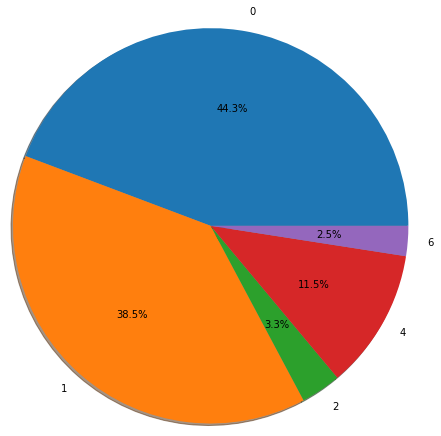

In [45]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')


plt.title('Out Type')
plt.subplot(the_grid[0, 1], aspect=1)

source_pie = plt.pie(df1['overs'], labels=['0','1','2','4','6'], autopct='%1.1f%%', shadow=True,radius=2)


plt.show()

As we can see majority of runs is obtained via taking singles and there are a lot of dot balls in the game that accounts for approx 45% of the total balls that is around 54 balls or 9 overs

**Dismissal type** 

In [46]:
p2= df.groupby('out type').count()
p2

,overs,Batting Team,Batsman on strike,batsman on non-strike,bowler,runs scored,extras,player dismissed,wides,total runs
out type,,,,,,,,,,
bowled,3,3,3,3,3,3,3,3,0,3
caught,2,2,2,2,2,2,2,2,0,2
lbw,1,1,1,1,1,1,1,1,0,1
run out,2,2,2,2,2,2,2,2,0,2


It's clear that total 8 wickets have fallen as total count count of player dismissed accounts for 8(3+2+1+2)

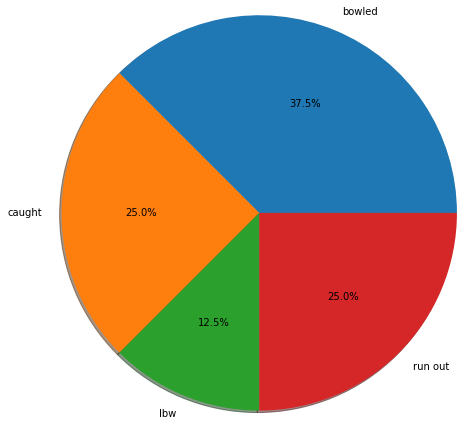

In [47]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')


plt.title('Out Type')
plt.subplot(the_grid[0, 1], aspect=1)

source_pie = plt.pie(p2['overs'], labels=['bowled','caught','lbw','run out'], autopct='%1.1f%%', shadow=True,radius=2)


plt.show()

Majority of batsmans have got bowled out in the 1st innings
The no of batsmans got caught out is equal to the number of players got run out

**Analyzing Run rate scenerio**

In [49]:
runs={}
for i in range(1,21):
    
    a1=df['overs'] < i
    a2=df['overs'] > i-1
    
    a3=df[a1 & a2]
    
    runs[i]= a3['total runs'].sum()
    

In [51]:
runs
#it's a dictionary and we will convert it into a DataFrame

{1: 7,
 2: 10,
 3: 0,
 4: 14,
 5: 6,
 6: 3,
 7: 4,
 8: 4,
 9: 3,
 10: 6,
 11: 2,
 12: 12,
 13: 9,
 14: 7,
 15: 9,
 16: 10,
 17: 4,
 18: 1,
 19: 10,
 20: 8}

In [52]:
rpo=pd.DataFrame([runs])
rpo1= rpo.T

In [53]:
rpo1.columns=['Runs']
rpo1['over']= rpo1.index
rpo1.head()

,Runs,over
1,7,1
2,10,2
3,0,3
4,14,4
5,6,5


In [55]:
rpo1= rpo1[['over','Runs']]

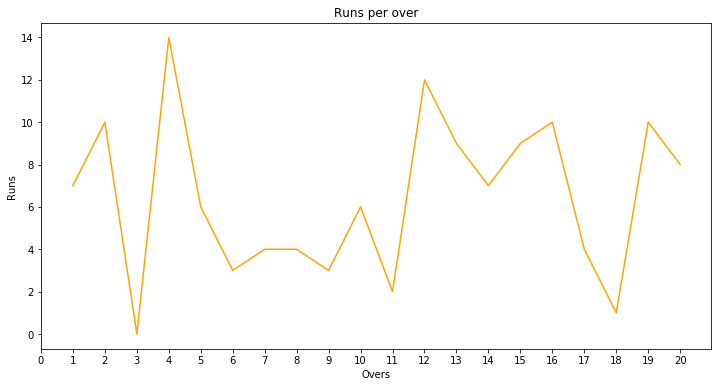

In [56]:
plt.figure(figsize=(12,6))
plt.plot(rpo1['over'],rpo1['Runs'],color='orange')
plt.xticks(np.arange(21))
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.title('Runs per over')
plt.show()

As we can see at the start run rate increases at first then it decreases and then it increase again.
In the mid overs from 6 to 11 , run rate is almost constant and it is 4 runs per over.
In the next span from over 12 to 16, we have run rate around of 10 runs per over.
The batting team is unanble to score at the death overs that results into a low target of 129